<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/13_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 50kB/s 
     |████████████████████████████████| 3.1MB 29.3MB/s 
     |████████████████████████████████| 501kB 56.3MB/s 


In [0]:
%%capture
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Flatten, Input, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
D = 1
def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0: #(-,-,-)
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0: #(-,+,+)
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0: #(+,-,+)
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0: #(+,+,-)
    return 1
  return 0

def generate_data(T, is_short = True):
  X = []
  Y = []
  for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    if is_short:
      y = get_label(x, -1, -2, -3) # short distance
    else:
      y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

  X = np.array(X)
  y = np.array(Y)
  return X, Y

## Linear model

In [5]:
T = 10
X, Y = generate_data(T)

i = Input(shape = (T,))
x = Dense(1, activation = "sigmoid")(i)

model = Model(i, x)
model.compile(loss= "binary_crossentropy", optimizer = Adam(lr = 0.01), metrics = ["accuracy"])
r = model.fit(X, Y, validation_split=0.2, epochs = 40)

Train on 4000 samples, validate on 1000 samples
Epoch 1/40
4000/4000 [==============================] - 0s 74us/sample - loss: 0.7531 - accuracy: 0.4978 - val_loss: 0.6984 - val_accuracy: 0.4840
Epoch 2/40
4000/4000 [==============================] - 0s 41us/sample - loss: 0.6948 - accuracy: 0.5142 - val_loss: 0.6950 - val_accuracy: 0.4920
Epoch 3/40
4000/4000 [==============================] - 0s 41us/sample - loss: 0.6948 - accuracy: 0.5077 - val_loss: 0.6943 - val_accuracy: 0.5070
Epoch 4/40
4000/4000 [==============================] - 0s 42us/sample - loss: 0.6942 - accuracy: 0.5117 - val_loss: 0.6942 - val_accuracy: 0.4870
Epoch 5/40
4000/4000 [==============================] - 0s 43us/sample - loss: 0.6947 - accuracy: 0.5125 - val_loss: 0.6944 - val_accuracy: 0.5030
Epoch 6/40
4000/4000 [==============================] - 0s 38us/sample - loss: 0.6947 - accuracy: 0.5085 - val_loss: 0.6934 - val_accuracy: 0.5090
Epoch 7/40
4000/4000 [==============================] - 0s 38us/sample

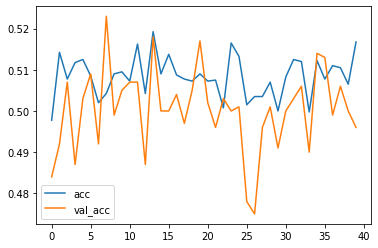

In [6]:
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()

## SimpleRNN Short distance

In [7]:
T = 10
X, Y = generate_data(T)
inputs = np.expand_dims(X, -1) # (N * T * D)

i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = "sigmoid")(x)

model = Model(i, x)
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.01), metrics = ["accuracy"])

r = model.fit(inputs, Y, validation_split = 0.5, epochs = 30)

Train on 2500 samples, validate on 2500 samples
Epoch 1/30
2500/2500 [==============================] - 1s 317us/sample - loss: 0.6912 - accuracy: 0.5332 - val_loss: 0.6757 - val_accuracy: 0.5444
Epoch 2/30
2500/2500 [==============================] - 0s 122us/sample - loss: 0.6730 - accuracy: 0.5696 - val_loss: 0.6702 - val_accuracy: 0.5508
Epoch 3/30
2500/2500 [==============================] - 0s 120us/sample - loss: 0.6617 - accuracy: 0.5872 - val_loss: 0.6496 - val_accuracy: 0.6128
Epoch 4/30
2500/2500 [==============================] - 0s 122us/sample - loss: 0.6280 - accuracy: 0.6560 - val_loss: 0.5979 - val_accuracy: 0.7116
Epoch 5/30
2500/2500 [==============================] - 0s 125us/sample - loss: 0.5690 - accuracy: 0.7324 - val_loss: 0.5319 - val_accuracy: 0.7568
Epoch 6/30
2500/2500 [==============================] - 0s 123us/sample - loss: 0.4914 - accuracy: 0.7976 - val_loss: 0.4528 - val_accuracy: 0.8048
Epoch 7/30
2500/2500 [==============================] - 0s 122us

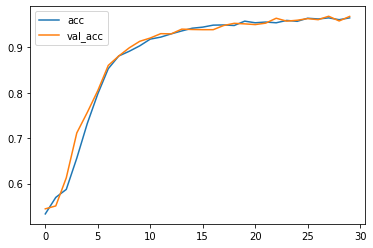

In [8]:
# easily learning the pattern
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()

##SimpleRNN Long distance

In [9]:
T = 10
X, Y = generate_data(T, False)
inputs = np.expand_dims(X, -1) # (N * T * D)

i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = "sigmoid")(x)

model = Model(i, x)
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.01), metrics = ["accuracy"])

r = model.fit(inputs, Y, validation_split = 0.5, epochs = 100)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 327us/sample - loss: 0.7063 - accuracy: 0.4936 - val_loss: 0.6945 - val_accuracy: 0.5140
Epoch 2/100
2500/2500 [==============================] - 0s 122us/sample - loss: 0.6964 - accuracy: 0.4828 - val_loss: 0.6912 - val_accuracy: 0.5256
Epoch 3/100
2500/2500 [==============================] - 0s 121us/sample - loss: 0.6948 - accuracy: 0.5032 - val_loss: 0.6923 - val_accuracy: 0.5188
Epoch 4/100
2500/2500 [==============================] - 0s 118us/sample - loss: 0.6947 - accuracy: 0.5064 - val_loss: 0.6919 - val_accuracy: 0.5144
Epoch 5/100
2500/2500 [==============================] - 0s 122us/sample - loss: 0.6936 - accuracy: 0.5088 - val_loss: 0.6933 - val_accuracy: 0.5256
Epoch 6/100
2500/2500 [==============================] - 0s 121us/sample - loss: 0.6932 - accuracy: 0.5088 - val_loss: 0.6935 - val_accuracy: 0.5100
Epoch 7/100
2500/2500 [==============================] - 0

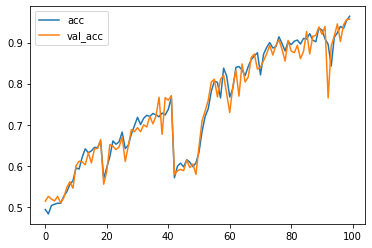

In [10]:
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()

##SimpleRNN Long distance 20 time step

In [11]:
T = 20
X, Y = generate_data(T, False)
inputs = np.expand_dims(X, -1) # (N * T * D)

i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = "sigmoid")(x)

model = Model(i, x)
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.01), metrics = ["accuracy"])

r = model.fit(inputs, Y, validation_split = 0.5, epochs = 100)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 398us/sample - loss: 0.7257 - accuracy: 0.5016 - val_loss: 0.7099 - val_accuracy: 0.4772
Epoch 2/100
2500/2500 [==============================] - 0s 165us/sample - loss: 0.6951 - accuracy: 0.5024 - val_loss: 0.6979 - val_accuracy: 0.4784
Epoch 3/100
2500/2500 [==============================] - 0s 172us/sample - loss: 0.6958 - accuracy: 0.4868 - val_loss: 0.6958 - val_accuracy: 0.4760
Epoch 4/100
2500/2500 [==============================] - 0s 169us/sample - loss: 0.6931 - accuracy: 0.5236 - val_loss: 0.6935 - val_accuracy: 0.4948
Epoch 5/100
2500/2500 [==============================] - 0s 174us/sample - loss: 0.6924 - accuracy: 0.5224 - val_loss: 0.6921 - val_accuracy: 0.5208
Epoch 6/100
2500/2500 [==============================] - 0s 170us/sample - loss: 0.6922 - accuracy: 0.5260 - val_loss: 0.6927 - val_accuracy: 0.5112
Epoch 7/100
2500/2500 [==============================] - 0

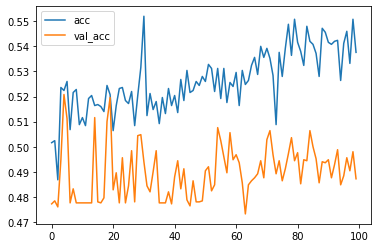

In [12]:
# having hard time learning the pattern
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()

##LSTM Long distance with 20 sequence

In [13]:
T = 20
X, Y = generate_data(T, False)
inputs = np.expand_dims(X, -1) # (N * T * D)

i = Input(shape = (T, D))
x = LSTM(5)(i)
x = Dense(1, activation = "sigmoid")(x)

model = Model(i, x)
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.01), metrics = ["accuracy"])

r = model.fit(inputs, Y, validation_split = 0.5, epochs = 200)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 703us/sample - loss: 0.6959 - accuracy: 0.4848 - val_loss: 0.6936 - val_accuracy: 0.4988
Epoch 2/200
2500/2500 [==============================] - 1s 299us/sample - loss: 0.6935 - accuracy: 0.5136 - val_loss: 0.6936 - val_accuracy: 0.4928
Epoch 3/200
2500/2500 [==============================] - 1s 306us/sample - loss: 0.6934 - accuracy: 0.5048 - val_loss: 0.6940 - val_accuracy: 0.4964
Epoch 4/200
2500/2500 [==============================] - 1s 308us/sample - loss: 0.6931 - accuracy: 0.5128 - val_loss: 0.6937 - val_accuracy: 0.4912
Epoch 5/200
2500/2500 [==============================] - 1s 307us/sample - loss: 0.6928 - accuracy: 0.5176 - val_loss: 0.6944 - val_accuracy: 0.4936
Epoch 6/200
2500/2500 [==============================] - 1s 309us/sample - loss: 0.6933 - accuracy: 0.5048 - val_loss: 0.6941 - val_accuracy: 0.4916
Epoch 7/200
2500/2500 [==============================] - 1

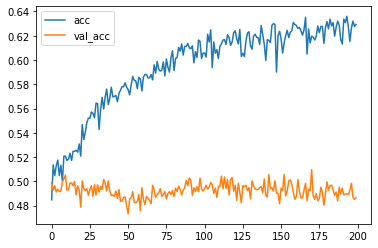

In [14]:
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()

##LSTM Long distance with 30 time steps and return_sequences = True 

In [16]:
T = 30
X, Y = generate_data(T, False)
inputs = np.expand_dims(X, -1) # (N * T * D)

i = Input(shape = (T, D))
x = LSTM(5, return_sequences=True)(i) # shape (T*M)
x = GlobalMaxPooling1D()(x) # shape (M)
x = Dense(1, activation = "sigmoid")(x)

model = Model(i, x)
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.01), metrics = ["accuracy"])

r = model.fit(inputs, Y, validation_split = 0.5, epochs = 100)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 2s 837us/sample - loss: 0.6950 - accuracy: 0.4880 - val_loss: 0.6928 - val_accuracy: 0.5096
Epoch 2/100
2500/2500 [==============================] - 1s 424us/sample - loss: 0.6934 - accuracy: 0.5040 - val_loss: 0.6935 - val_accuracy: 0.5020
Epoch 3/100
2500/2500 [==============================] - 1s 425us/sample - loss: 0.6935 - accuracy: 0.5076 - val_loss: 0.6926 - val_accuracy: 0.5156
Epoch 4/100
2500/2500 [==============================] - 1s 425us/sample - loss: 0.6933 - accuracy: 0.4960 - val_loss: 0.6926 - val_accuracy: 0.5028
Epoch 5/100
2500/2500 [==============================] - 1s 471us/sample - loss: 0.6931 - accuracy: 0.5116 - val_loss: 0.6927 - val_accuracy: 0.5160
Epoch 6/100
2500/2500 [==============================] - 1s 449us/sample - loss: 0.6917 - accuracy: 0.5272 - val_loss: 0.6917 - val_accuracy: 0.5200
Epoch 7/100
2500/2500 [==============================] - 1

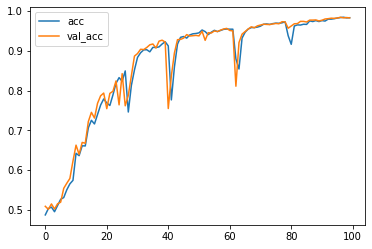

In [17]:
# Easy for the LSTM even with 30 time steps
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()